# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [6]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_trainf, y_trainf = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [7]:
import cv2

X_trainf.shape

(39209, 32, 32, 3)

In [8]:
### Replace each question mark with the appropriate value.
import numpy as np
# TODO: Number of training examples
n_train = X_trainf.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_trainf.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_trainf))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


In [9]:
X_trainf.shape

(39209, 32, 32, 3)

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

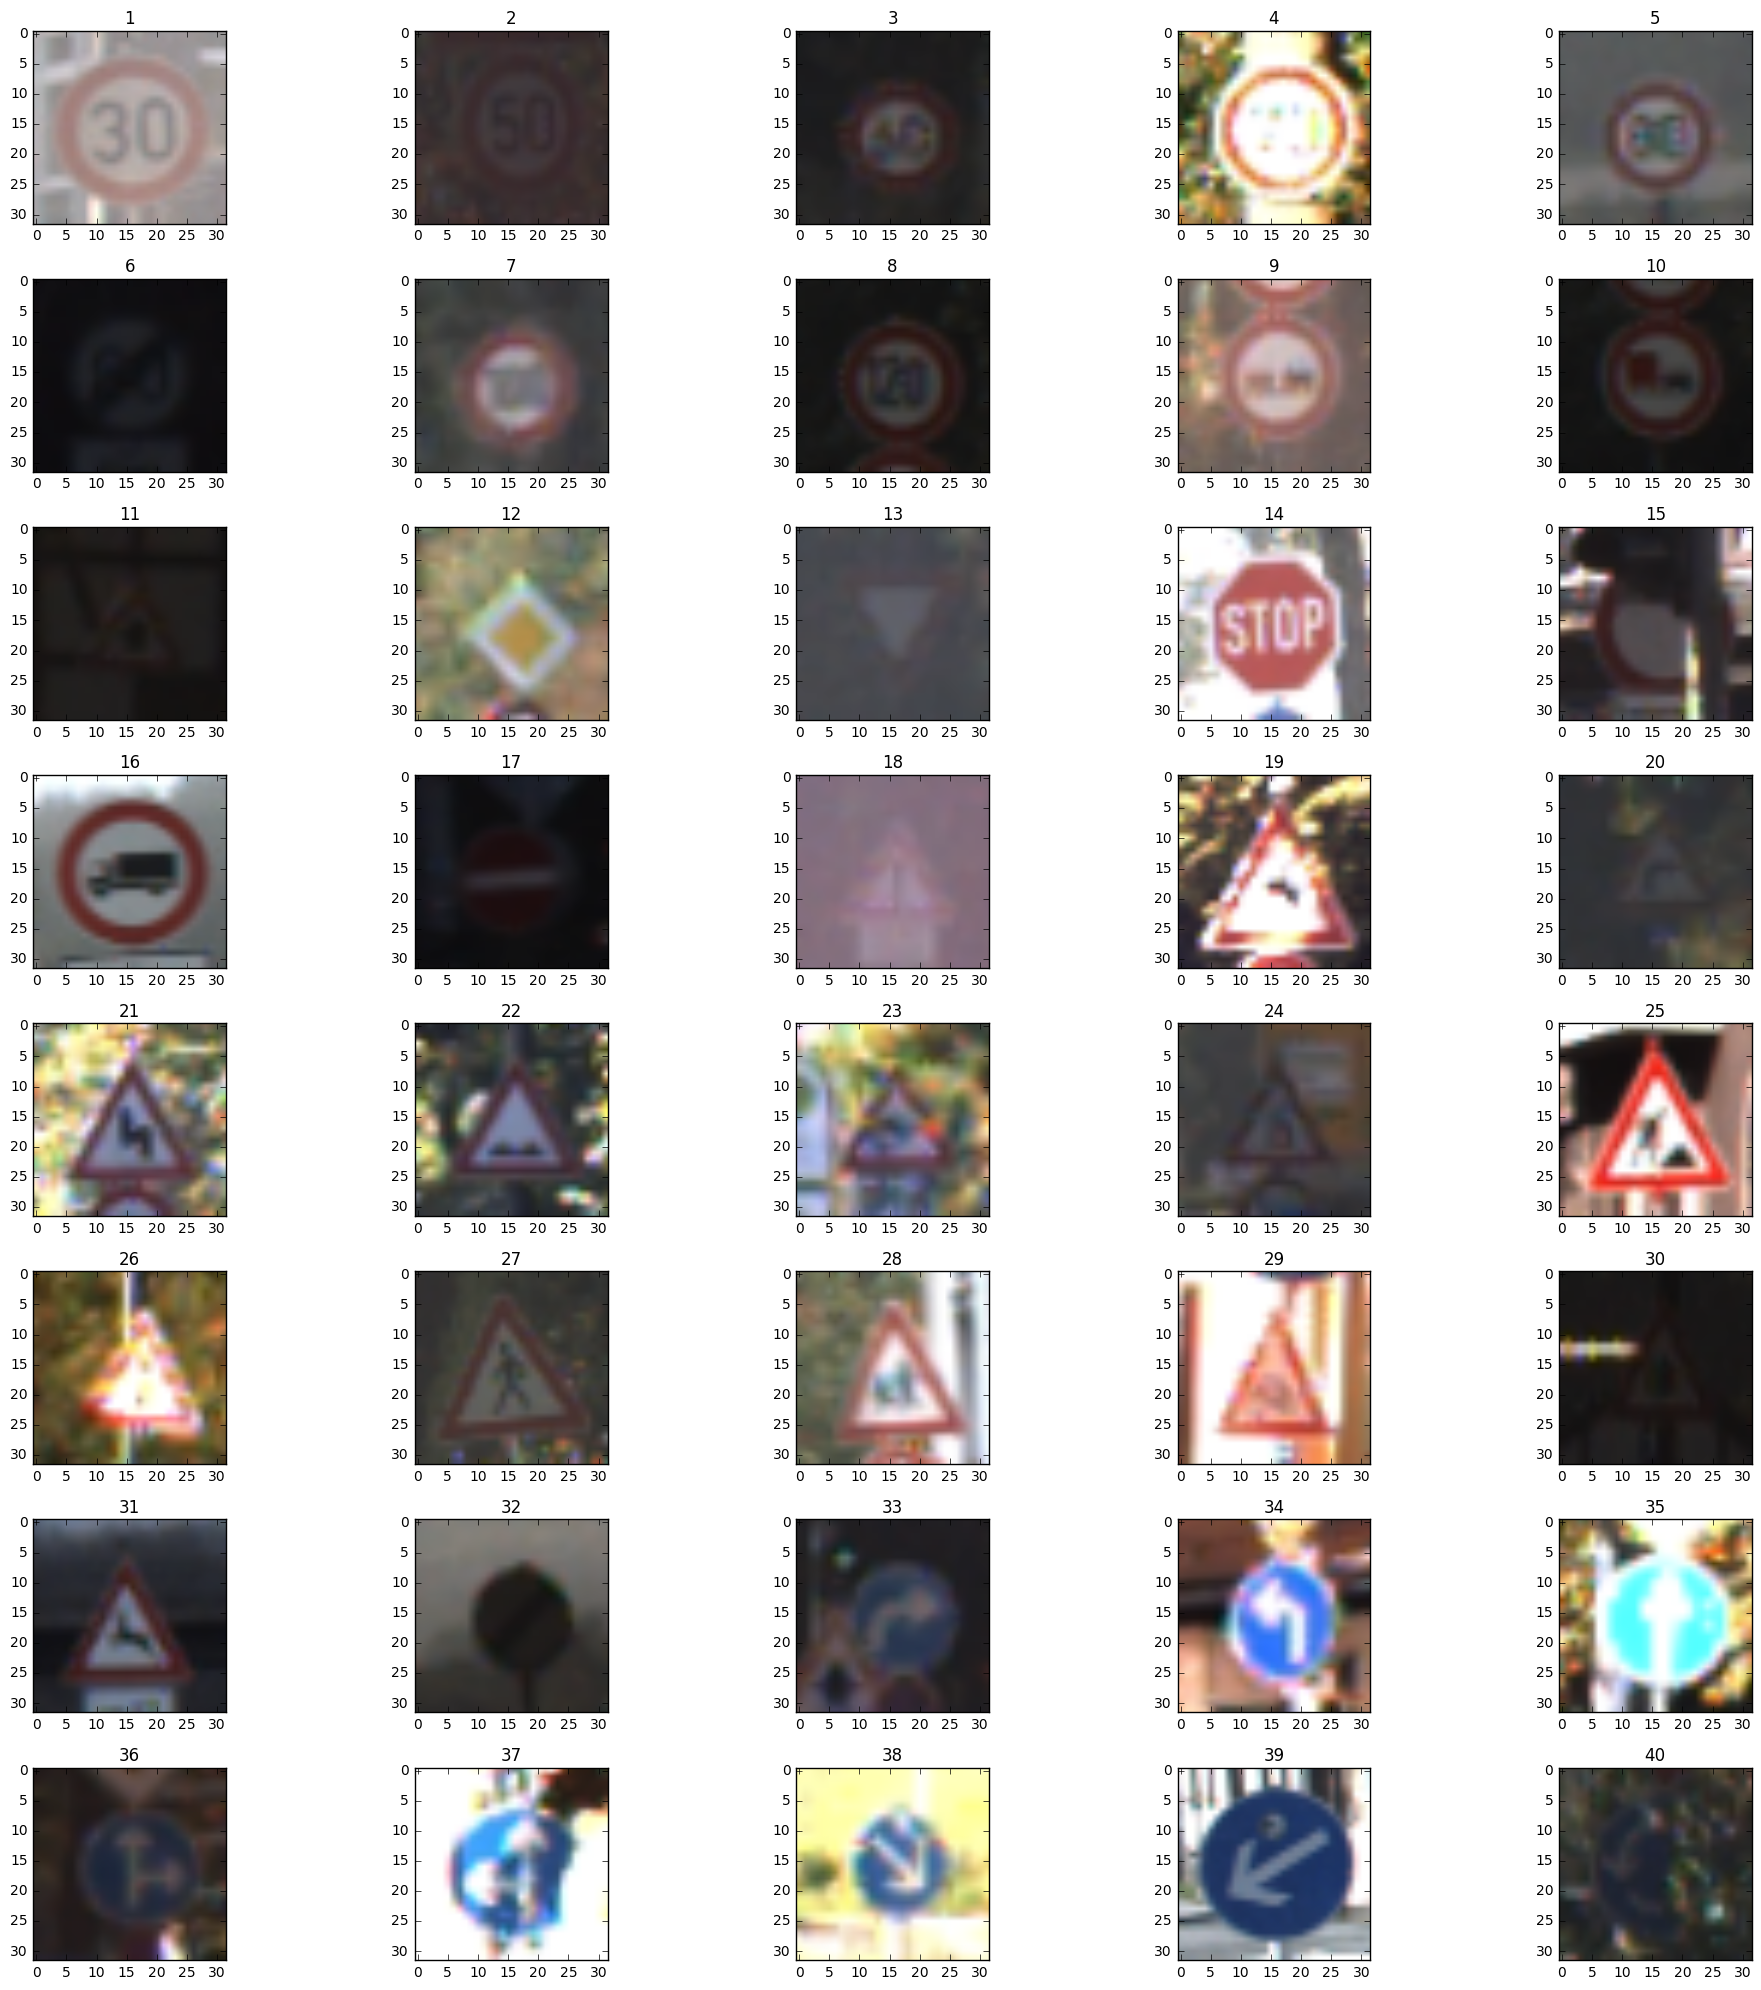

In [10]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Visualizations will be shown in the notebook.
%matplotlib inline
classes = np.unique(y_trainf)
if True:
    fig = plt.figure(figsize=(20,20))
    gs = gridspec.GridSpec(8, 5)
    k = 0
    for i in range(8):
        for j in range(5):
            k += 1
            y = X_trainf[y_trainf == classes[k]][0]
            ax1 = fig.add_subplot(gs[i,j])
            ax1.set_title(str(k))
            ax1.imshow(y)
    fig.tight_layout()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [11]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import tensorflow as tf


In [12]:
#from tensorflow image preprocessing inception v3 model
import random
def generateNewImage(image):
  with tf.Session() as sess:
    color_ordering = random.randint(0, 1)
    if color_ordering == 0:
      image = tf.image.random_brightness(image, max_delta=32. / 255.)
      image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
      image = tf.image.random_hue(image, max_delta=0.2)
      image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    elif color_ordering == 1:
      image = tf.image.random_brightness(image, max_delta=32. / 255.)
      image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
      image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
      image = tf.image.random_hue(image, max_delta=0.2)
    image = tf.expand_dims(image, 0)
    return image.eval()



### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Preprocessing of data is done by mean normalization. Following are the steps for normalization.
- substract mean
- divide by std deviation


X_train -= np.mean(X_train, axis = 0)
X_train /= np.std(X_train, axis = 0)

Doing normalization helps in backpropagation since the gradient corrections will be less oscillating and converges faster towards local minima. 


In [13]:
imgs = []
for i in range(10):
    imgs.append(generateNewImage(X_trainf[i]))


In [14]:
ximgs = np.reshape(imgs,(10,32,32,3))
X_train = np.vstack((X_trainf,ximgs))
y_train = np.concatenate((y_trainf,y_trainf[0:10]))
print(X_train.shape)  
print(y_train.shape)

(39219, 32, 32, 3)
(39219,)


In [15]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
X_train = X_train.astype(np.float32)
X_train -= np.mean(X_train, axis = 0)
X_train /= np.std(X_train, axis = 0)
print(X_train.shape)  
print(y_train.shape)

X_test = X_test.astype(np.float32)
X_test -= np.mean(X_test, axis = 0)
X_test /= np.std(X_test, axis = 0)
print(X_test.shape)

(39219, 32, 32, 3)
(39219,)
(12630, 32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Validation set is created as one third of the training data set using sklearn train_test_split function. Test data is loaded and not used for training or validation purpose.

New data is generated using generateNewImage above. It does random color distortion of images and adds it to the training data set

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The architecture being followed in LeNet with the following layers:(as described in lecture notes)
Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
 - Followed by Activation and Max Pooling

Layer 2: Convolutional. Output = 10x10x16.
 - Followed by Activation and Max Pooling

Layer 3: Fully Connected. Input = 400. Output = 120.
  - Followed by Activation

Layer 4: Fully Connected. Input = 120. Output = 84.
  - Followed by Activation

Layer 5: Fully Connected. Input = 84. Output = 43.

Output is different classes in the dataset

In [17]:
EPOCHS = 20
BATCH_SIZE = 128

In [18]:
### Train your model here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [19]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43, dtype='int32')


In [20]:
rate = 0.001


logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

outd = {}
from sklearn.utils import shuffle
def trainModel(nepoch=EPOCHS,bsize=BATCH_SIZE, lr = .001):
    with tf.Session() as sess:
        global X_train, y_train
        valid_acc = []
        rate = lr
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        print("Training...")
        print()
        for i in range(nepoch):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, bsize):
                end = offset + bsize
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            validation_accuracy = evaluate(X_validation, y_validation)
            valid_acc.append(validation_accuracy)
        outd[(nepoch,bsize,lr)] = valid_acc
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

        saver = tf.train.Saver()
        saver.save(sess, 'model/ndclassfier'+str(nepoch)+str(bsize))
        print("Model saved")
        

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [22]:
#trainModel(nepoch=30,bsize=128)
#trainModel(nepoch=30,bsize=256)
#trainModel(nepoch=30,bsize=512)
#trainModel(nepoch=5,bsize=512)
#trainModel(nepoch=200,bsize=512)
#trainModel(nepoch=300,bsize=512)

#optimizer = tf.train.RMSPropOptimizer(learning_rate = rate)
trainModel(nepoch=300,bsize=512)

Training...

EPOCH 300 ...
Validation Accuracy = 0.987

Model saved


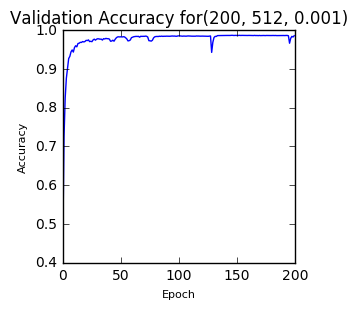

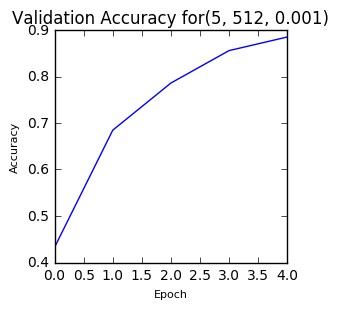

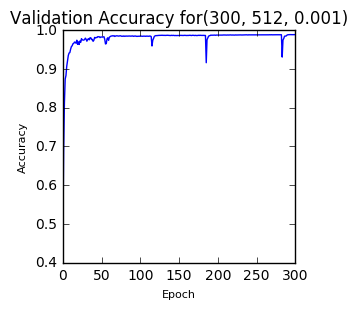

In [79]:
if True:
    keys = list(outd.keys())
    for k in range(len(keys)):
        plt.figure(figsize=(3,3))
        plt.plot(outd[keys[k]])
        plt.title('Validation Accuracy for' + str(keys[k]))
        plt.xlabel('Epoch', fontsize=8)
        plt.ylabel('Accuracy', fontsize=8)
        plt.show()      

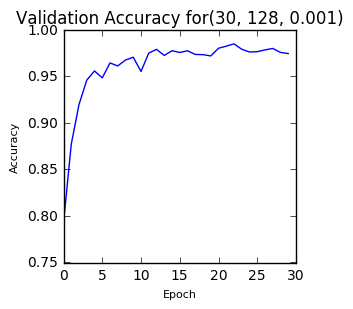

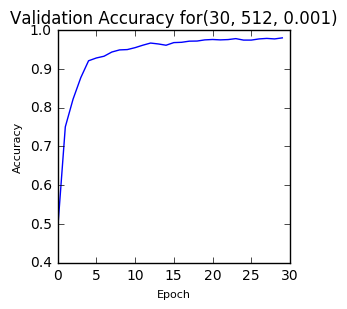

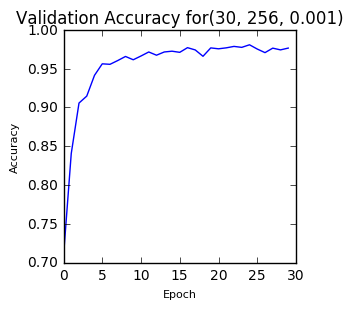

In [42]:
if True:
    keys = list(outd.keys())
    for k in range(len(keys)):
        plt.figure(figsize=(3,3))
        plt.plot(outd[keys[k]])
        plt.title('Validation Accuracy for' + str(keys[k]))
        plt.xlabel('Epoch', fontsize=8)
        plt.ylabel('Accuracy', fontsize=8)
        plt.show()        


In [100]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('model/ndclassfierrms'+str(300)+str(512)+'.meta')
    loader.restore(sess, 'model/ndclassfierrms'+str(300)+str(512))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.912


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I tried with AdamOptimizer and RMSProp with 0.001 learning rate. Various batch size and epoch hyperparameters are shown in plot above

Using Adam Optimizer:
- As batch size increased from 128 to 512, less flucation in validation accuracy
- Number of epochs increased the validation accuracy (At 300 epochs, Validation Accuracy = 0.988 and Test Accuracy of 0.920)

Using RMSPROP Optimizer:
Validation Accuracy after 300 epochs: 0.987 which is on par with Adam Optimizer but test accuracy decreased to 0.912

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

LeNet architecture was used for image classification and next step has been to try different optimizers, batch size and epochs to get high validation accuracy. 

LeNet is a multi layer neural network trained with back propogation and it uses convolutions, max pooling, activations and FC layers to find features for each of the output classes and do the right image classification.

Also the validation error was higher for the same number of epochs when the images are not normalized.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

14.png
15.png
2.png
24.png
25.png
27.png
28.png
3.png
33.png
34.png
36.png
37.png


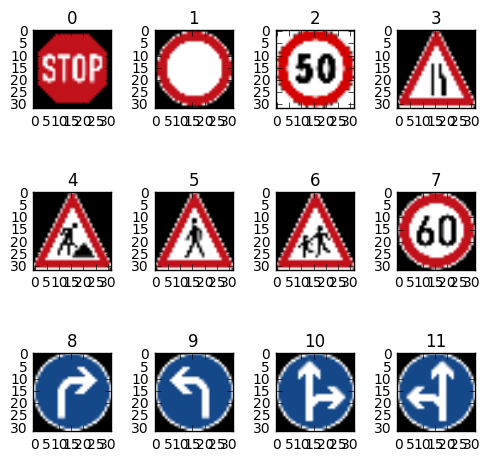

In [2]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import os, os.path
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Visualizations will be shown in the notebook.
%matplotlib inline

timgs = []
path = "extra"
for f in os.listdir(path):
    print(f)
    rimg =cv2.imread(os.path.join(path,f))
    rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB) 
    rimg = cv2.resize(rimg,(32,32))
    #print(rimg.shape)
    timgs.append(rimg)
    
if True:
    fig = plt.figure(figsize=(5,5))
    gs = gridspec.GridSpec(3, 4)
    k = 0
    for i in range(3):
        for j in range(4):
            ax1 = fig.add_subplot(gs[i,j])
            ax1.set_title(str(k))
            ax1.imshow(timgs[k])
            k += 1
    fig.tight_layout()
    


In [4]:
import numpy as np
timgs = np.array(timgs)
timgs = timgs.astype(np.float32)
timgs -= np.mean(timgs, axis = 0)
timgs /= np.std(timgs, axis = 0)
print(timgs.shape)

(12, 32, 32, 3)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The images are plotted above and I got those images on internet. All the images are straight forward with clear picture and no background confusion.


In [23]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('model/ndclassfier'+str(300)+str(512)+'.meta')
    loader.restore(sess, 'model/ndclassfier'+str(300)+str(512))
    predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=3),feed_dict={x: timgs})
    #predictions = sess.run(logits,feed_dict={x: cimg})
    #predictions = np.squeeze(predictions)
    #top_k = predictions.argsort()[-k:][::-1]
    #print(top_k)
    print(predictions)


TopKV2(values=array([[  9.78992283e-01,   2.10077371e-02,   2.43492004e-09],
       [  9.83763456e-01,   1.62361525e-02,   9.52253387e-08],
       [  9.99995232e-01,   4.82221958e-06,   4.14414380e-12],
       [  9.56479132e-01,   4.34118956e-02,   1.08994202e-04],
       [  9.99938011e-01,   6.19823695e-05,   3.07374177e-33],
       [  1.00000000e+00,   4.19345514e-15,   1.37968831e-22],
       [  1.00000000e+00,   1.86987812e-08,   1.31039818e-10],
       [  8.04425120e-01,   1.95574880e-01,   6.18794729e-13],
       [  1.00000000e+00,   4.54504486e-16,   4.88851800e-19],
       [  9.99914646e-01,   8.48038762e-05,   4.50070075e-07],
       [  9.99995232e-01,   4.76436662e-06,   8.61651942e-16],
       [  9.99927521e-01,   7.24628626e-05,   1.09406506e-09]], dtype=float32), indices=array([[15, 14,  9],
       [15, 39, 35],
       [ 3,  5,  6],
       [19, 24, 21],
       [25, 10,  5],
       [11, 27, 30],
       [28, 19,  9],
       [ 2,  3,  5],
       [33, 24, 23],
       [11, 34, 

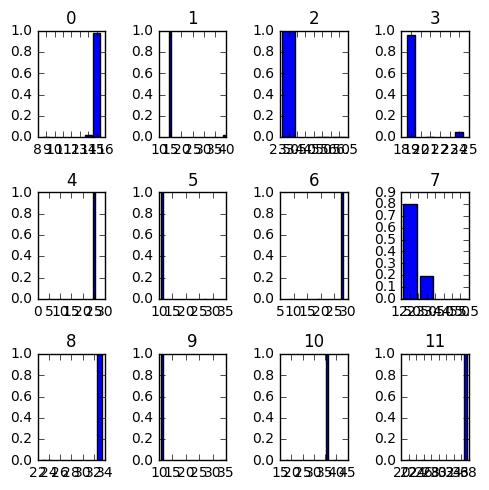

In [29]:
if True:
    fig = plt.figure(figsize=(5,5))
    gs = gridspec.GridSpec(3, 4)
    k = 0
    for i in range(3):
        for j in range(4):
            ax1 = fig.add_subplot(gs[i,j])
            ax1.set_title(str(k))
            ax1.bar(predictions[1][k],predictions[0][k],align='center')
            #ax1.xticks(predictions[1][0])
            #ax1.show()
            k += 1
    fig.tight_layout()


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
Correct class for the images used for prediction:
14
15
2
24
25
27
28
3
33
34
36
37

comparing with the predictions, only 7 out of 12 got correct predictions with  accuracy of 58.3% 

The prediction  accuracy of the test dataset is 92% where as prediction accuracy of  real world dataset is  58%, possible reasons are:
- Number of samples in  real world dataset is 12 and chances of statistical variation is very high
-  Real world doesn't sample exactly as the training/test dataset since test/train captures similar kind of samples
-  Model used training dataset and  learned the model efficiently and test dataset  are statistical samples from the  complete  traffic signs dataset before test/train random split
- Larger capacity models(with more layers) and enhanced dataset augmentation techinques would have improved the prediction on the real world dataset


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The predictions are confident and close to 1 for each of the classification images.

It's kind of surprising that 'STOP' sign is not classified correctly and also it's not in top 3 predictions. 

'Speed Limit 50' is also not predicted correctly. 

My thoughts:
Deep networks like resnet or inception would have increased prediction accuracy by using deep and residual layer architecture. 
Adding more image augmentation will also help with prediction.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.